## 티처빌 전처리

## 참조
- https://serendipity77.tistory.com/entry/%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EC%98%81%ED%99%94%EB%8F%99%EA%B0%90-%EB%8C%93%EA%B8%80-%EB%A6%AC%EB%B7%B0-%EC%9B%8C%EB%93%9C-%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9Cwordcloud%EB%A1%9C-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0%ED%8C%8C%EC%9D%B4%EC%8D%AC-Python
- https://christinarok.github.io/2021/04/08/mecab.html

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Colab에 konlpy 설치
!pip install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install wordcloud

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import re
import os
# import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import konlpy
from collections import Counter
from konlpy.tag import Okt
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

## 폰트 불러오기

In [2]:
import platform

path = "C:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

In [6]:
# import matplotlib.font_manager as fm
# sys_font = fm.findSystemFonts()
# [f for f  in sys_font if 'Nanum' in f]
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname = path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

## 데이터 불러오기

In [3]:
#icecream_df = pd.read_csv('/content/drive/MyDrive/빅데이터5/BigData/아이스크림_데이터셋.csv', encoding='cp949')
teachervile_df = pd.read_csv('티처빌_데이터셋.csv', encoding='cp949')

In [4]:
df = teachervile_df.copy()
df

,credit,name,reviews,ratings,category,date,label,tokenized
0,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22,1,"['유튜브', '시청', '쉬워도', '유튜브', '제작', '마냥', '어려운',..."
1,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요 감사합니다,5,어학,2023-10-22,1,"['귀', '쏙쏙', '들어오', '설명', '해', '주', '셔서', '정말',..."
2,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다,5,학습지도,2023-10-22,1,"['교습소', '운영', '도움', '되', '정보', '얻', '수', '있', ..."
3,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히 ...,5,생활지도,2023-10-22,1,"['좋', '연수', '예요', '듣', '기', '부담', '스럽', '않', '..."
4,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요 차근차근 설명...,4,인문·교양,2023-10-22,1,"['연수', '제목', '맞', '금융', '문명', '탈출', '위한', '기초'..."
...,...,...,...,...,...,...,...,...
14623,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다 인도주의도 인성교육 측면에서 필요한데 연수를 통해...,5,인문·교양,2023-07-22,1,"['학교', '교육', '인성', '교육', '중요', '인도주의', '인성', '..."
14624,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22,1,"['코딩', '대한', '기초', '적', '지식', '알', '수', '있', '..."
14625,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으면 해요,5,생활지도,2023-07-22,1,"['모바일', '연수', '좋', '았', '어요', '자치', '대한', '이론'..."
14626,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22,1,"['연수', '통해', '재능', '뛰어난', '학생', '조기', '발굴', '타..."


In [253]:
#date_period = pd.date_range(start='2023-07-22', end='2023-10-22')
#date_period = date_period.strftime('%Y-%m-%d')
#date_list = [i for i in date_period]

In [254]:
#m = df['date'].apply(lambda x: True if x in date_list else False)
#df = df[m]

In [5]:
df

,credit,name,reviews,ratings,category,date,label,tokenized
0,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22,1,"['유튜브', '시청', '쉬워도', '유튜브', '제작', '마냥', '어려운',..."
1,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요 감사합니다,5,어학,2023-10-22,1,"['귀', '쏙쏙', '들어오', '설명', '해', '주', '셔서', '정말',..."
2,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다,5,학습지도,2023-10-22,1,"['교습소', '운영', '도움', '되', '정보', '얻', '수', '있', ..."
3,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히 ...,5,생활지도,2023-10-22,1,"['좋', '연수', '예요', '듣', '기', '부담', '스럽', '않', '..."
4,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요 차근차근 설명...,4,인문·교양,2023-10-22,1,"['연수', '제목', '맞', '금융', '문명', '탈출', '위한', '기초'..."
...,...,...,...,...,...,...,...,...
14623,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다 인도주의도 인성교육 측면에서 필요한데 연수를 통해...,5,인문·교양,2023-07-22,1,"['학교', '교육', '인성', '교육', '중요', '인도주의', '인성', '..."
14624,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22,1,"['코딩', '대한', '기초', '적', '지식', '알', '수', '있', '..."
14625,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으면 해요,5,생활지도,2023-07-22,1,"['모바일', '연수', '좋', '았', '어요', '자치', '대한', '이론'..."
14626,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22,1,"['연수', '통해', '재능', '뛰어난', '학생', '조기', '발굴', '타..."


In [6]:
df.drop(['tokenized'], axis =1, inplace=True)

In [7]:
df.rename(columns = {'text' : 'reviews',
                       'star' : 'ratings'}, inplace=True)
df

,credit,name,reviews,ratings,category,date,label
0,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22,1
1,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요 감사합니다,5,어학,2023-10-22,1
2,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다,5,학습지도,2023-10-22,1
3,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히 ...,5,생활지도,2023-10-22,1
4,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요 차근차근 설명...,4,인문·교양,2023-10-22,1
...,...,...,...,...,...,...,...
14623,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다 인도주의도 인성교육 측면에서 필요한데 연수를 통해...,5,인문·교양,2023-07-22,1
14624,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22,1
14625,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으면 해요,5,생활지도,2023-07-22,1
14626,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22,1


In [258]:
#df['label'] = np.select([df.ratings > 3], [1], default=0)
df

,credit,name,reviews,ratings,category,date,label
0,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22,1
1,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요 감사합니다,5,어학,2023-10-22,1
2,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다,5,학습지도,2023-10-22,1
3,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히 ...,5,생활지도,2023-10-22,1
4,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요 차근차근 설명...,4,인문·교양,2023-10-22,1
...,...,...,...,...,...,...,...
14623,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다 인도주의도 인성교육 측면에서 필요한데 연수를 통해...,5,인문·교양,2023-07-22,1
14624,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22,1
14625,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으면 해요,5,생활지도,2023-07-22,1
14626,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22,1


In [15]:
print(df.isnull().values.any())  # null 값 유무 확인

False


In [274]:
df

,credit,name,reviews,ratings,category,date,label
0,1학점,"1인 미디어 전성시대, 유튜브 브런치",유튜브 시청은 쉬워도 유튜브 제작은 마냥 어려운 일이었는데 그 간격을 조금은 줄여주...,4,디지털활용,2023-10-22,1
1,1학점,15가지 스킬로 끝내는 영어 리스닝 무작정 따라하기,귀에 쏙쏙 들어오게 설명해주셔서 정말 좋았어요 감사합니다,5,어학,2023-10-22,1
2,0학점,2023년 학원 및 교습소 설립·운영자 연수,교습소 운영에 도움 되는 정보들을 얻을 수 있어 유익한 시간이 되었던 것 같습니다,5,학습지도,2023-10-22,1
3,4학점,위로와 격려로 다시 쓰는 교사 위기 극복 가이드,좋은 연수예요 듣기 부담스럽지 않으면서 어디서도 듣기 어려운 적당히 가볍고 적당히 ...,5,생활지도,2023-10-22,1
4,1학점,"아는 만큼 쌓이는 금융잔고, 교사 금융문맹 탈출기(주식, 부동산)",연수 제목과 맞게 금융문명탈출을 위한 기초적인 내용을 알게 되었어요 차근차근 설명...,4,인문·교양,2023-10-22,1
...,...,...,...,...,...,...,...
14623,1학점,현장 멘토들과 함께 하는 인도주의 실천 가이드,학교 교육에서 인성교육이 중요하다 인도주의도 인성교육 측면에서 필요한데 연수를 통해...,5,인문·교양,2023-07-22,1
14624,1학점,누구나 쉽게 할 수 있는 AI 코딩블록 (AI 코디니),코딩에 대한 기초적인 지식을 알 수 있었으며 티쳐블 머신이나 딥러닝 같은 개념들도 ...,5,디지털활용,2023-07-22,1
14625,1학점,"미래교육의 첫 걸음, 학교자치",모바일 연수로 좋았어요 자치에 대한 이론적 개념이 좋았구요 실제적 예시가 더 있으면 해요,5,생활지도,2023-07-22,1
14626,2학점,스마트한 교실을 위한 영재교육비법,이번 연수를 통해 재능이 뛰어난 학생을 조기에 발굴하여 타고난 잠재력을 계발할 수 ...,5,학습지도,2023-07-22,1


In [ ]:
## 데이터 정제
# 한글과 공백을 제외하고 모두 제거

df['reviews'] = df['reviews'].str.replace("[^가-힣 ]","")
df['reviews'].replace('', np.nan, inplace=True)
df = df.dropna(axis=0)
print(df.isnull().sum())
print('전처리 후 샘플의 개수 :', len(df))

In [9]:
okt = Okt()

In [ ]:
stopwords = open("불용어.txt", "r", encoding = 'utf-8')
stopwords = stopwords.read().splitlines()


In [ ]:
negative_words = df[df.label == 0]['reviews']
positive_words = df[df.label == 1]['reviews']


## 불용어 제거만

In [16]:
# 긍정 단어에서 불용어 제거

pos_t = []
for i in positive_words:
    pos = okt.morphs(i, stem=True) #토큰화
    stopwords_removed_pos = [word for word in pos
                                 if not word in stopwords]
    pos_t.append(stopwords_removed_pos)

In [17]:
# 부정 단어에서 불용어 제거

neg_t = []
for i in negative_words:
    neg = okt.morphs(i, stem=True) #토큰화
    stopwords_removed_neg = [word for word in neg
                             if not word in stopwords]
    neg_t.append(stopwords_removed_neg)

In [18]:
pos_t
before_positive_word_count = Counter(np.hstack(pos_t))

In [19]:
neg_t
before_negative_word_count = Counter(np.hstack(neg_t))

## 공통 단어 제거

In [21]:
common = before_negative_word_count & before_positive_word_count
common_list = list(common)
print(common_list)

['수업', '준비', '수행', '평가', '학급', '활동', '하다', '좋다', '감사하다', '개괄', '적', '인', '이해', '도움', '되다', '중등', '이나', '고등학교', '학생', '겪다', '어려움', '대해', '자다', '되어다', '다문화', '라는', '말', '주다', '차별', '요소', '강하다', '생각', '이렇다', '부분', '대한', '논의', '관', '한', '내용', '도', '다루다', '어떻다', '싶다', '라서', '학교', '지원', '교사', '보다', '가정', '자녀', '드러나다', '상처', '받다', '경우', '많이', '상급', '서다', '알', '게', '전체', '데', '는', '다큐', '로만', '이루어지다', '자료', '최신', '아니다', '년도', '영상', '이다', '좀더', '필요하다', '중간', '멈추다', '에러', '번', '연수', '은', '보통', '평소', '또는', '미술', '중', '그리다', '그림', '의미', '담기다', '수', '계기', '생활', '지도', '기대하다', '약물', '남용', '마약', '전문가', '강의', '듣다', '들다', '시스템', '문제', '퀴즈', '풀', '고', '나다', '더', '모르다', '크다', '못', '새롭다', '없다', '강사', '분들', '열심히', '늘다', '죄송하다', '솔직하다', '적다', '업무', '활용', '청소년', '류', '예방', '정보', '서', '하고', '교육', '적용', '이론', '너무', '전문', '담당', '보다는', '선생님', '께', '의무', '않다', '불안정하다', '진도', '확인', '학습', '완료', '매일', '게시판', '글', '올리다', '이수', '번거롭다', '스트레스', '구성', '다큐프라임', '방송', '분', '단순하다', '편집', '이며', '융합', '사례', '예시', '오래되다', '당시'

In [ ]:
positive_word_count = before_positive_word_count.copy()
for common in common_list:
    positive_word_count.pop(common)
positive_word_count

In [ ]:
negative_word_count = before_negative_word_count.copy()
for common in common_list:
    negative_word_count.pop(common)
negative_word_count

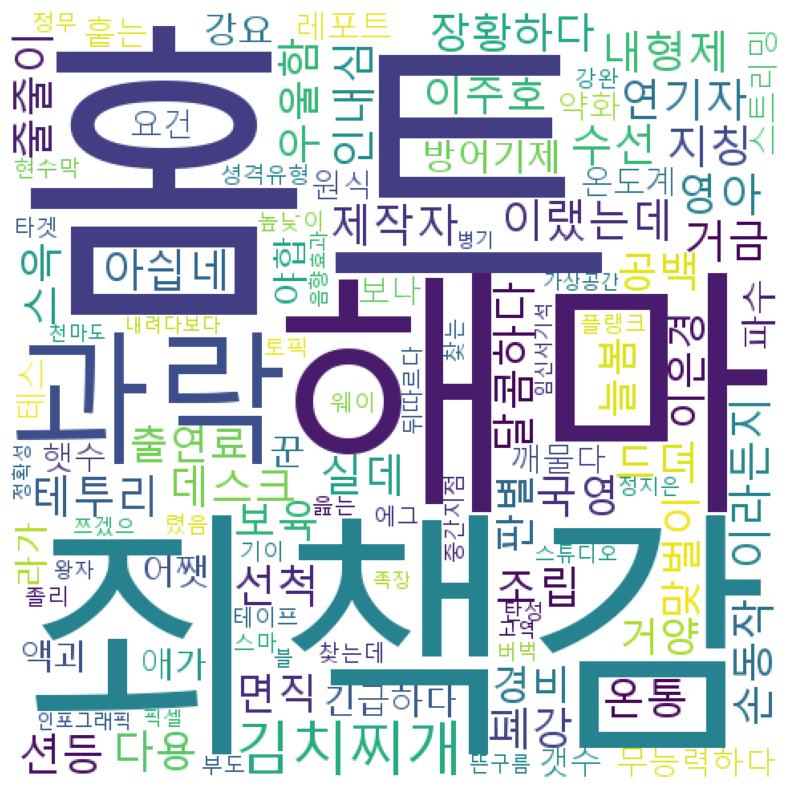

In [26]:
## 시각
wc = WordCloud(font_path = path, width = 480,
               height = 480, background_color = 'white')
# 긍정 필터링 전: before_positive_word_count
# 부정 필터링 전: before_negative_word_count
# 긍정 필터링 후: positive_word_count
# 부정 필터링 후: negative_word_count
img_wordcloud = wc.generate_from_frequencies(negative_word_count)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

# 티처빌_워드클라우드_긍정
# 티처빌_워드클라우드_부정
# 티처빌_워드클라우드_긍정필터링
# 티처빌_워드클라우드_부정필터링
wc.to_file('티처빌_워드클라우드_부정필터링.png') # 파일 저장